There are n cities numbered from 0 to n-1. Given the array edges where edges[i] = [fromi, toi, weighti] represents a bidirectional and weighted edge between cities fromi and toi, and given the integer distanceThreshold.

Return the city with the smallest number of cities that are reachable through some path and whose distance is at most distanceThreshold, If there are multiple such cities, return the city with the greatest number.

Notice that the distance of a path connecting cities i and j is equal to the sum of the edges' weights along that path.

 

Example 1:

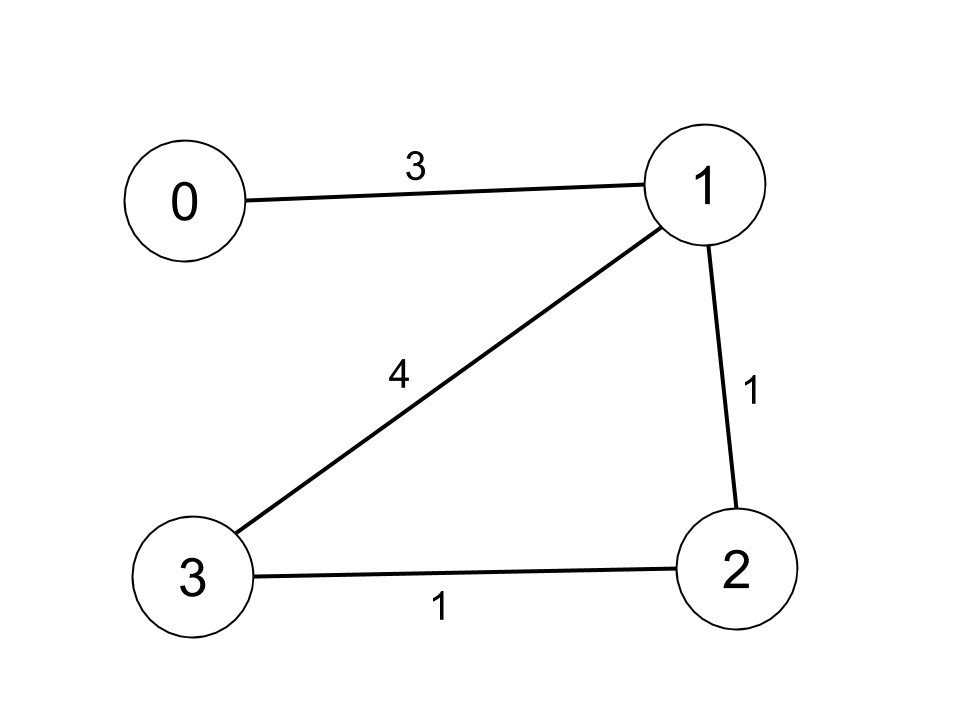

Input: n = 4, edges = [[0,1,3],[1,2,1],[1,3,4],[2,3,1]], distanceThreshold = 4
Output: 3
Explanation: The figure above describes the graph. 
The neighboring cities at a distanceThreshold = 4 for each city are:
City 0 -> [City 1, City 2] 
City 1 -> [City 0, City 2, City 3] 
City 2 -> [City 0, City 1, City 3] 
City 3 -> [City 1, City 2] 
Cities 0 and 3 have 2 neighboring cities at a distanceThreshold = 4, but we have to return city 3 since it has the greatest number.

Example 2:

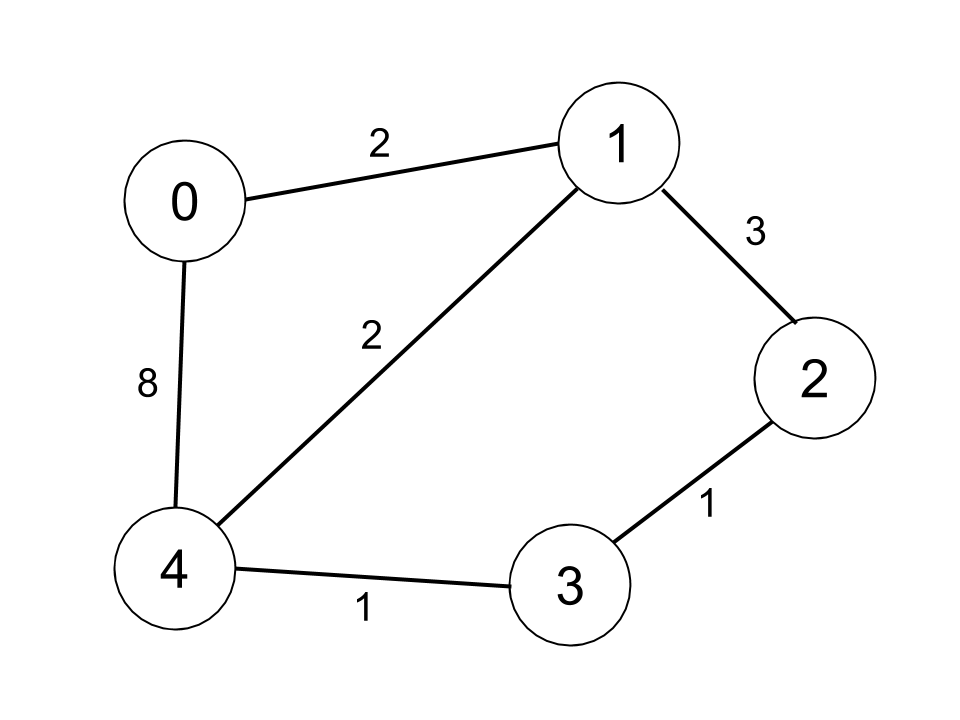

Input: n = 5, edges = [[0,1,2],[0,4,8],[1,2,3],[1,4,2],[2,3,1],[3,4,1]], distanceThreshold = 2
Output: 0
Explanation: The figure above describes the graph. 
The neighboring cities at a distanceThreshold = 2 for each city are:
City 0 -> [City 1] 
City 1 -> [City 0, City 4] 
City 2 -> [City 3, City 4] 
City 3 -> [City 2, City 4]
City 4 -> [City 1, City 2, City 3] 
The city 0 has 1 neighboring city at a distanceThreshold = 2.

 

Constraints:

    2 <= n <= 100
    1 <= edges.length <= n * (n - 1) / 2
    edges[i].length == 3
    0 <= fromi < toi < n
    1 <= weighti, distanceThreshold <= 10^4
    All pairs (fromi, toi) are distinct.



In [ ]:
class Solution:
    def findTheCity(self, n: int, edges: List[List[int]], distanceThreshold: int) -> int:
        # Adjacency list to store the graph
        adjacency_list = [[] for _ in range(n)]

        # Matrix to store shortest path distances from each city
        shortest_path_matrix = [[float("inf")] * n for _ in range(n)]

        # Initialize adjacency list and shortest path matrix
        for i in range(n):
            shortest_path_matrix[i][i] = 0  # Distance to itself is zero

        # Populate the adjacency list with edges
        for start, end, weight in edges:
            adjacency_list[start].append((end, weight))
            adjacency_list[end].append((start, weight))  # For undirected graph

        # Compute shortest paths from each city using Dijkstra's algorithm
        for i in range(n):
            self.dijkstra(n, adjacency_list, shortest_path_matrix[i], i)

        # Find the city with the fewest number of reachable cities within the distance threshold
        return self.get_city_with_fewest_reachable(
            n, shortest_path_matrix, distanceThreshold
        )

    # Dijkstra's algorithm to find shortest paths from a source city
    def dijkstra(
        self,
        n: int,
        adjacency_list: List[List[tuple]],
        shortest_path_distances: List[int],
        source: int,
    ):
        # Priority queue to process nodes with the smallest distance first
        priority_queue = [(0, source)]
        shortest_path_distances[:] = [float("inf")] * n
        shortest_path_distances[source] = 0  # Distance to itself is zero

        # Process nodes in priority order
        while priority_queue:
            current_distance, current_city = heapq.heappop(priority_queue)
            if current_distance > shortest_path_distances[current_city]:
                continue

            # Update distances to neighboring cities
            for neighbor_city, edge_weight in adjacency_list[current_city]:
                if (
                    shortest_path_distances[neighbor_city]
                    > current_distance + edge_weight
                ):
                    shortest_path_distances[neighbor_city] = (
                        current_distance + edge_weight
                    )
                    heapq.heappush(
                        priority_queue,
                        (shortest_path_distances[neighbor_city], neighbor_city),
                    )

    # Determine the city with the fewest number of reachable cities within the distance threshold
    def get_city_with_fewest_reachable(
        self,
        n: int,
        shortest_path_matrix: List[List[int]],
        distance_threshold: int,
    ) -> int:
        city_with_fewest_reachable = -1
        fewest_reachable_count = n

        # Count number of cities reachable within the distance threshold for each city
        for i in range(n):
            reachable_count = sum(
                1
                for j in range(n)
                if i != j and shortest_path_matrix[i][j] <= distance_threshold
            )

            # Update the city with the fewest reachable cities
            if reachable_count <= fewest_reachable_count:
                fewest_reachable_count = reachable_count
                city_with_fewest_reachable = i
        return city_with_fewest_reachable